Baseline Summary:
 count    866.000000
mean      38.270208
std       28.500376
min      -24.000000
25%       19.000000
50%       32.000000
75%       51.000000
max      131.000000
Name: Payment Received, dtype: float64

Treatment Summary:
 count    943.000000
mean     157.290562
std      114.361295
min     -101.000000
25%       76.000000
50%      140.000000
75%      208.000000
max      524.000000
Name: Payment Received, dtype: float64
Baseline Median: 32.0, Treatment Median: 140.0
Baseline Mode: 25.0, Treatment Mode: 116.0
Baseline Range: 155.0, Treatment Range: 625.0
SubjectID
1     172.777273
2      63.343876
3     159.766115
4     138.876660
5     111.951613
6     173.677171
7     112.303718
8     113.005698
9     141.746429
10    130.901639
11     97.833945
12     60.739106
13     86.655143
14     98.335561
15    113.740479
16    134.784131
17    155.925101
Name: Payment Received, dtype: float64
The treatment group shows an improvement in the average payment received.
On average, pa

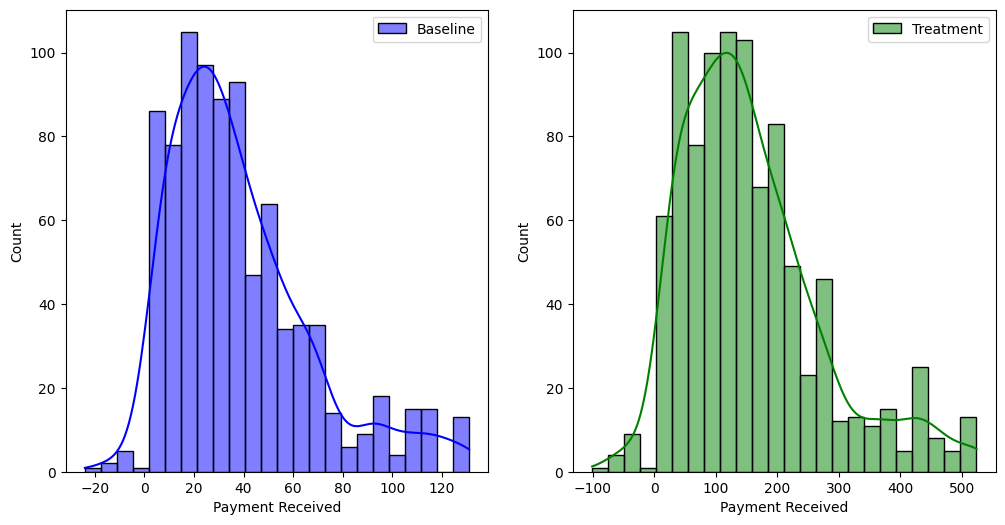

       SubjectID  Payment Improvement
count  17.000000            17.000000
mean    9.000000           121.550803
std     5.049752            34.160325
min     1.000000            60.739106
25%     5.000000            98.335561
50%     9.000000           113.740479
75%    13.000000           141.746429
max    17.000000           173.677171


/Users/devynmiller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.



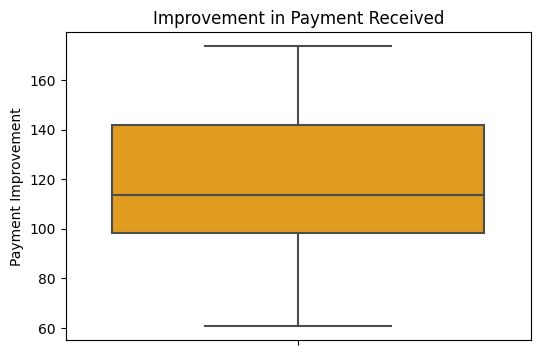

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
import plotly.express as px
import plotly.graph_objects as go

# Load the datasets
df_baseline = pd.read_csv('investment_2023-12-11.csv')
df_treatment = pd.read_csv('investment_S2_2023-12-13.csv')

# Filter out the rows where 'Payment Received' is NaN or empty
df_baseline['Payment Received'] = pd.to_numeric(df_baseline['Payment Received'], errors='coerce')
df_treatment['Payment Received'] = pd.to_numeric(df_treatment['Payment Received'], errors='coerce')
df_baseline = df_baseline.dropna(subset=['Payment Received'])
df_treatment = df_treatment.dropna(subset=['Payment Received'])

# Summary statistics for baseline
summary_baseline = df_baseline['Payment Received'].describe()

# Summary statistics for treatment
summary_treatment = df_treatment['Payment Received'].describe()

print("Baseline Summary:\n", summary_baseline)
print("\nTreatment Summary:\n", summary_treatment)

# Additional Descriptive EDA
median_baseline = df_baseline['Payment Received'].median()
median_treatment = df_treatment['Payment Received'].median()
mode_baseline = df_baseline['Payment Received'].mode()[0]  # Taking the first mode
mode_treatment = df_treatment['Payment Received'].mode()[0]
range_baseline = df_baseline['Payment Received'].max() - df_baseline['Payment Received'].min()
range_treatment = df_treatment['Payment Received'].max() - df_treatment['Payment Received'].min()

print(f"Baseline Median: {median_baseline}, Treatment Median: {median_treatment}")
print(f"Baseline Mode: {mode_baseline}, Treatment Mode: {mode_treatment}")
print(f"Baseline Range: {range_baseline}, Treatment Range: {range_treatment}")

# Calculate average payment received per participant for both sessions
avg_payment_baseline = df_baseline.groupby('SubjectID')['Payment Received'].mean()
avg_payment_treatment = df_treatment.groupby('SubjectID')['Payment Received'].mean()

# Calculate improvement
improvement = avg_payment_treatment - avg_payment_baseline

# Display improvement
print(improvement)

# Conditional Logic for Implications
if summary_treatment['mean'] > summary_baseline['mean']:
    print("The treatment group shows an improvement in the average payment received.")
else:
    print("The treatment group does not show significant improvement in the average payment received.")

# Analyzing improvement
if improvement.mean() > 0:
    print("On average, participants improved their payment received from the first to the second session.")
else:
    print("On average, there was no significant improvement in payment received from the first to the second session.")

effect_size = 0.8  # Medium effect size
alpha = 0.05  # Significance level
power = 0.8  # Power

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)
print(f"Required sample size: {sample_size}")

# Power Analysis Result Implication
if sample_size > len(df_baseline):
    print("The required sample size for a significant result is larger than the baseline sample size. More data may be needed.")
else:
    print("The baseline sample size is sufficient for a significant result with the specified effect size and power.")

# Histograms of payments received
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_baseline['Payment Received'], kde=True, color='blue', label='Baseline')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df_treatment['Payment Received'], kde=True, color='green', label='Treatment')
plt.legend()
plt.show()

# Convert 'improvement' Series to DataFrame and reset index
improvement_df = improvement.reset_index(name='Payment Improvement')

# Ensure the data is correctly formatted and contains expected values
print(improvement_df.describe())

# Now, use this DataFrame for the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=improvement_df, y='Payment Improvement', orient='h', color='orange')
plt.title('Improvement in Payment Received')
plt.show()

# Interactive Histograms of payments received using Plotly
fig = px.histogram(df_baseline, x='Payment Received', color_discrete_sequence=['blue'], labels={'Payment Received': 'Payment Received in Baseline'}, title='Payment Received in Baseline')
fig.show()

fig = px.histogram(df_treatment, x='Payment Received', color_discrete_sequence=['green'], labels={'Payment Received': 'Payment Received in Treatment'}, title='Payment Received in Treatment')
fig.show()

# Interactive Boxplot of Improvement using Plotly
fig = px.box(improvement_df, y='Payment Improvement', color_discrete_sequence=['orange'], labels={'Payment Improvement': 'Improvement in Payment Received'}, title='Improvement in Payment Received')
fig.show()

# Combined Histogram of Baseline and Treatment Payments Received for Direct Comparison
fig = px.histogram(df_baseline, x='Payment Received', color_discrete_sequence=['blue'], labels={'Payment Received': 'Payment Received'}, title='Payment Received: Baseline vs. Treatment', barmode='overlay')
fig.add_trace(go.Histogram(x=df_treatment['Payment Received'], name='Treatment', marker_color='green', opacity=0.75))

# To ensure bar widths are the same, we adjust the 'nbins' parameter for both histograms
# Calculate the appropriate number of bins based on the range of 'Payment Received' across both datasets
combined_range = max(df_baseline['Payment Received'].max(), df_treatment['Payment Received'].max()) - min(df_baseline['Payment Received'].min(), df_treatment['Payment Received'].min())
bin_width = combined_range / 30  # Example bin width calculation, adjust '30' based on desired granularity

# Update the histograms to use the calculated 'nbins'
fig.update_traces(xbins=dict(start=min(df_baseline['Payment Received'].min(), df_treatment['Payment Received'].min()), size=bin_width), selector=dict(type='histogram'))

# Update the layout to accommodate the combined data
fig.update_layout(
    barmode='overlay',  # Overlay the histograms to see both distributions
    legend_title_text='Group',
    legend=dict(
        itemsizing='constant',  # Ensure consistent legend marker size
        traceorder='normal',
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update axes titles
fig.update_xaxes(title_text='Payment Received')
fig.update_yaxes(title_text='Count')

# Add a legend to differentiate between Baseline and Treatment
fig.update_traces(opacity=0.75)  # Adjust opacity to make the overlay more visible
fig.show()


In [2]:
# import pandas as pd
# from scipy import stats

# df1 = pd.read_csv('investment_2023-12-11.csv')
# df2 = pd.read_csv('investment_S2_2023-12-13.csv')


# # Merge datasets on 'SubjectID' to compare the same participants
# # Merge datasets on 'SubjectID' to compare the same participants
# merged_df = pd.merge(df1, df2, on='SubjectID', suffixes=('_day1', '_day2'))

# # Ensure both 'Parts Completed' columns for both days are not NaN by using inner join
# merged_df = merged_df.dropna(subset=['Parts Completed_day1', 'Parts Completed_day2'])

# # Now, the lengths of parts_completed_day1 and parts_completed_day2 should be equal
# parts_completed_day1 = merged_df['Parts Completed_day1']
# parts_completed_day2 = merged_df['Parts Completed_day2']

# # Perform the paired t-test
# t_stat, p_value = stats.ttest_rel(parts_completed_day1, parts_completed_day2)

# print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 82.4806445914858, P-value: 0.0


In [3]:
# from statsmodels.stats.power import TTestIndPower

# # Parameters for power analysis
# effect_size = 0.5  # assumed effect size (small=0.2, medium=0.5, large=0.8)
# alpha = 0.05  # significance level
# power = 0.8  # desired power

# analysis = TTestIndPower()
# sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')

# print(f'Sample Size: {sample_size}')

Sample Size: 63.765611775409695
